In [61]:
import librosa
import IPython.display as ipd
# ipd.Audio('audio/conga_groove.wav') # load a local WAV file
# ipd.Audio(x, rate=sr) # load a NumPy array
import os,glob
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [21]:
path_keyboard = '/home/kiosk/dnn2/AVTR/keyboard/merged_keyboard.wav'
root_hospital = '/home/kiosk/dnn2/AVTR/hospital_16kHz/'
root_clean    = '/home/kiosk/dnn2/AVTR/AVA-Speech-clean/'
root_noise    = '/home/kiosk/dnn2/background_noise/'

# Param

In [87]:
sr = 16000
sec_keyboard = 5.0
sec_hospital = 4.0
sec_clean    = 5.0
sec_noise    = 10.0

SNR_keyboard = 5.0
SNR_hospital = 5.0
SNR_noise    = 5.0

# Sampling

In [80]:
list_hospital = [x for x in glob.glob(os.path.join(root_hospital,'*.wav'))]
list_clean    = [x for x in glob.glob(os.path.join(root_clean,'*.wav'))]
list_noise    = [x for x in glob.glob(os.path.join(root_noise,'*.wav'))]
print(len(list_hospital))
print(len(list_clean))
print(len(list_noise))

562
96
17


In [81]:
path_hospital = list_hospital[np.random.randint(len(list_hospital))]
path_clean = list_clean[np.random.randint(len(list_clean))]
path_noise = list_noise[np.random.randint(len(list_noise))]

In [82]:
raw_keyboard,_  = librosa.load(path_keyboard,sr=sr)
raw_hospital,_ = librosa.load(path_hospital,sr=sr)
raw_clean,_     = librosa.load(path_clean,sr=sr)
raw_noise,_     = librosa.load(path_noise,sr=sr)

# Indexing

In [83]:
n_sample_keyboard = int(sec_keyboard * sr)
n_sample_hospital = int(sec_hospital * sr)
n_sample_clean = int(sec_clean * sr)
n_sample_noise = int(sec_noise * sr)

idx_keyboard = np.random.randint(len(raw_keyboard) - n_samples_keyboard)
idx_hospital = np.random.randint(len(raw_hospital) - n_samples_hospital)
idx_clean    = np.random.randint(len(raw_clean)    - n_samples_clean)
idx_noise    = np.random.randint(len(raw_noise)    - n_samples_noise)

sample_keyboard = raw_keyboard[idx_keyboard : idx_keyboard + n_samples_keyboard]
sample_hospital = raw_hospital[idx_hospital : idx_hospital + n_samples_hospital]
sample_clean    = raw_clean   [idx_clean    : idx_clean    + n_samples_clean]
sample_noise    = raw_noise   [idx_noise    : idx_noise    + n_samples_noise]

print(len(sample_keyboard))
print(len(sample_hospital))
print(len(sample_clean))
print(len(sample_noise))

# norm sample
norm_keyboard = sample_keyboard/np.max(np.abs(sample_keyboard))
norm_hospital = sample_hospital/np.max(np.abs(sample_hospital))
norm_clean    = sample_clean/np.max(np.abs(sample_clean))
norm_noise    = sample_noise/np.max(np.abs(sample_noise))
print(np.max(np.abs(norm_keyboard)))
print(np.max(np.abs(norm_hospital)))
print(np.max(np.abs(norm_clean)))
print(np.max(np.abs(norm_noise)))

80000
64000
80000
160000
1.0
1.0
1.0
1.0


In [84]:
ipd.display(ipd.Markdown('## norm_keyboard'))
ipd.display(ipd.Audio(norm_keyboard, rate=sr))
ipd.display(ipd.Markdown('## norm_hospital'))
ipd.display(ipd.Audio(norm_hospital, rate=sr))
ipd.display(ipd.Markdown('## norm_clean'))
ipd.display(ipd.Audio(norm_clean, rate=sr))
ipd.display(ipd.Markdown('## norm_noise'))
ipd.display(ipd.Audio(norm_noise, rate=sr))

## norm_keyboard

## norm_hospital

## norm_clean

## norm_noise

# Mixing

In [88]:
ratio_keyboard = np.power(10,SNR_keyboard/10)
ratio_hospital = np.power(10,SNR_hospital/10)
ratio_noise = np.power(10,SNR_noise/10)

mean_energy_keyboard = np.sqrt(np.sum(np.power(norm_keyboard,2)))/n_sample_keyboard
mean_energy_hospital = np.sqrt(np.sum(np.power(norm_hospital,2)))/n_sample_hospital
mean_energy_clean = np.sqrt(np.sum(np.power(norm_clean,2)))/n_sample_clean
mean_energy_noise = np.sqrt(np.sum(np.power(norm_noise,2)))/n_sample_noise

energy_normal_keyboard = np.sqrt(mean_energy_clean)/np.sqrt(mean_energy_keyboard)
energy_normal_hospital = np.sqrt(mean_energy_clean)/np.sqrt(mean_energy_hospital)
energy_normal_noise = np.sqrt(mean_energy_clean)/np.sqrt(mean_energy_noise)

weight_keyboard = energy_normal_keyboard/np.sqrt(ratio_keyboard)
weight_hospital = energy_normal_hospital/np.sqrt(ratio_hospital)
weight_noise    = energy_normal_noise/np.sqrt(ratio_noise)

print(ratio_keyboard)
print(ratio_hospital)
print(ratio_noise)

mix_keyboard = norm_keyboard * weight_keyboard
mix_hospital = norm_hospital * weight_hospital
mix_noise = norm_noise * weight_noise

offset_keyboard = np.random.randint(n_sample_noise - n_sample_keyboard)
offset_hospital = np.random.randint(n_sample_noise - n_sample_hospital)
offset_clean    = np.random.randint(n_sample_noise - n_sample_clean)

print(offset_keyboard)
print(offset_hospital)
print(offset_clean)

mixed                                                       = mix_noise
mixed[offset_keyboard:offset_keyboard + n_sample_keyboard] += mix_keyboard
mixed[offset_hospital:offset_hospital + n_sample_hospital] += mix_hospital
mixed[offset_clean:offset_clean       + n_sample_clean]    += norm_clean
mixed = mixed/np.max(np.abs(mixed))

3.1622776601683795
3.1622776601683795
3.1622776601683795
19061
36937
55052


## mixed

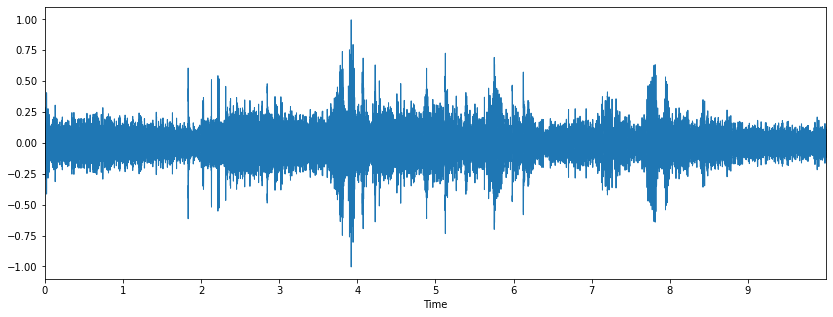

In [89]:
ipd.display(ipd.Markdown('## mixed'))
ipd.display(ipd.Audio(mixed, rate=sr))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(mixed, sr=sr)

# Playing

In [ ]:
ipd.Audio(dara, rate=sr)